# Merge the Cleaned Data Set

## Read the Cleaned Data Sets

Import Initial Libraries

In [48]:
#import pandas
import pandas as pd

#import os
import os

In [49]:
#Define directories
current_dir = os.getcwd()
project_dir = os.path.dirname(current_dir)
cleaned_data_sets_dir = os.path.join(project_dir,'Data_Base', 'Cleaned_Data_Set')

print (current_dir)
print (project_dir)
print (cleaned_data_sets_dir)

c:\Users\Rameez\OneDrive\MSc Data Science\Assignment - CIS 7031 Programming for Data Analysis\Project - CIS 7031\Codes
c:\Users\Rameez\OneDrive\MSc Data Science\Assignment - CIS 7031 Programming for Data Analysis\Project - CIS 7031
c:\Users\Rameez\OneDrive\MSc Data Science\Assignment - CIS 7031 Programming for Data Analysis\Project - CIS 7031\Data_Base\Cleaned_Data_Set


In [50]:
#Define the CSV files
employee_cleaned_csv_file = 'Employee_Cleaned.csv'
fields_cleaned_csv_file = 'Fields_Cleaned.csv'
workcode_cleaned_csv_file = 'WorkCode_Cleaned.csv'
workdetails_cleaned_csv_file = 'WorkDetails_Cleaned.csv'

#Define the relative path to the CSV files
employee_cleaned_csv_path = os.path.join(cleaned_data_sets_dir, employee_cleaned_csv_file)
fields_cleaned_csv_path = os.path.join(cleaned_data_sets_dir, fields_cleaned_csv_file)
workcode_cleaned_csv_path = os.path.join(cleaned_data_sets_dir, workcode_cleaned_csv_file)
workdetails_cleaned_csv_path = os.path.join(cleaned_data_sets_dir, workdetails_cleaned_csv_file)

In [51]:
#Read the CSV files
Employee_cdf = pd.read_csv(employee_cleaned_csv_path)
Fields_cdf = pd.read_csv(fields_cleaned_csv_path)
WorkCode_cdf = pd.read_csv(workcode_cleaned_csv_path)
WorkDetails_cdf = pd.read_csv(workdetails_cleaned_csv_path)

## Merge the Cleaned Data Sets

In [52]:
#Merge the Employee data set and WorkDetails data set on the `EmpCode` column
merged_df = pd.merge(WorkDetails_cdf, Employee_cdf, on="EmpCode", how="left")

#Merge the merged data set and Fields data set on the `EmpCode` column
merged_df = pd.merge(merged_df, Fields_cdf,on="EmpCode", how="left")

#Update the `Division` column in the merged_df DataFrame with the division information from the Employee data set
merged_df["Division"] = merged_df["Division_y"]

#Update the 'EState' column in the merged_df DataFrame with the estate information from the Employee data set
merged_df["Estate"] = merged_df["Estate_y"]

#Remove the Estate_x, Estate_y, Division_x, and Division_y columns from the merged_df DataFrame
merged_df = merged_df.drop(columns=["Estate_x", "Estate_y", "Division_x", "Division_y","EState"])

merged_df

,Year,Month,Day,EmpCode,Work,Workdayfraction,Qty,ExtraKilos,Gender,Division,CropType,Field,Area (Ha),NumberOfTree,Type,Estate
0,2012,6,20,41107,ABS,1.0,22.000000,0.0,F,HO,T,4CVP,2.0,26000,R,EST
1,2012,5,14,121200,SAC,1.0,58.000000,0.0,F,HO,T,6A,0.8,9302,R,EST
2,2012,1,27,121200,SAC,1.0,58.000000,0.0,F,HO,T,6A,0.8,9302,R,EST
3,2013,6,13,121200,SAC,1.0,58.000000,0.0,F,HO,T,6A,0.8,9302,R,EST
4,2014,3,12,121200,SAC,1.0,58.000000,0.0,F,HO,T,6A,0.8,9302,R,EST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043800,2012,1,18,2020808,ABS,1.0,58.000000,18.0,M,LD,T,4I,2.0,26000,R,EST
1043801,2012,6,6,6063131,ABS,1.0,58.000000,18.0,M,UD,T,GEN,3.0,17631,R,EST
1043802,2013,1,22,6065252,ABS,1.0,58.000000,18.0,F,MD,T,GM12,3.0,26000,C,EST
1043803,2013,5,15,1060500,ABS,1.0,58.000000,18.0,F,MD,T,CMDG,2.0,26000,C,EST


In [53]:
#Remove the NaN values from the merged_df DataFrame
merged_df = merged_df.dropna()
merged_df

,Year,Month,Day,EmpCode,Work,Workdayfraction,Qty,ExtraKilos,Gender,Division,CropType,Field,Area (Ha),NumberOfTree,Type,Estate
0,2012,6,20,41107,ABS,1.0,22.000000,0.0,F,HO,T,4CVP,2.0,26000,R,EST
1,2012,5,14,121200,SAC,1.0,58.000000,0.0,F,HO,T,6A,0.8,9302,R,EST
2,2012,1,27,121200,SAC,1.0,58.000000,0.0,F,HO,T,6A,0.8,9302,R,EST
3,2013,6,13,121200,SAC,1.0,58.000000,0.0,F,HO,T,6A,0.8,9302,R,EST
4,2014,3,12,121200,SAC,1.0,58.000000,0.0,F,HO,T,6A,0.8,9302,R,EST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043800,2012,1,18,2020808,ABS,1.0,58.000000,18.0,M,LD,T,4I,2.0,26000,R,EST
1043801,2012,6,6,6063131,ABS,1.0,58.000000,18.0,M,UD,T,GEN,3.0,17631,R,EST
1043802,2013,1,22,6065252,ABS,1.0,58.000000,18.0,F,MD,T,GM12,3.0,26000,C,EST
1043803,2013,5,15,1060500,ABS,1.0,58.000000,18.0,F,MD,T,CMDG,2.0,26000,C,EST


In [54]:
#inspect the merged_df DataFrame
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043805 entries, 0 to 1043804
Data columns (total 16 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Year             1043805 non-null  int64  
 1   Month            1043805 non-null  int64  
 2   Day              1043805 non-null  int64  
 3   EmpCode          1043805 non-null  int64  
 4   Work             1043805 non-null  object 
 5   Workdayfraction  1043805 non-null  float64
 6   Qty              1043805 non-null  float64
 7   ExtraKilos       1043805 non-null  float64
 8   Gender           1043805 non-null  object 
 9   Division         1043805 non-null  object 
 10  CropType         1043805 non-null  object 
 11  Field            1043805 non-null  object 
 12  Area (Ha)        1043805 non-null  float64
 13  NumberOfTree     1043805 non-null  int64  
 14  Type             1043805 non-null  object 
 15  Estate           1043805 non-null  object 
dtypes: float64(4), int

In [55]:
#Unique values in the merged_df DataFrame
merged_df.nunique()

Year                  4
Month                12
Day                  31
EmpCode            1561
Work                136
Workdayfraction       4
Qty                  95
ExtraKilos           22
Gender                2
Division              5
CropType              3
Field                63
Area (Ha)            18
NumberOfTree         34
Type                  3
Estate                1
dtype: int64

## Establish inferential relationships from data

For Division

In [56]:
#Get a new dataframe as Divisional_Efficiency_df which contain the columns Unique Count of EmpCode as 'No of Employees'
#Ratio of Total Qty to Unique Count of EmpCode as 'Average Qty by Employee'
#Ratio of Total ExtraKilos to Unique Count of EmpCode as 'Average ExtraKilos by Employee'
Divisional_Efficiency_df = merged_df.groupby("Division").agg({"EmpCode": "nunique", "Qty": "sum", "ExtraKilos": "sum"})
Divisional_Efficiency_df = Divisional_Efficiency_df.rename(columns={"EmpCode": "No of Employees", "Qty": "Total Qty", "ExtraKilos": "Total ExtraKilos"})
Divisional_Efficiency_df["Average Qty by Employee"] = Divisional_Efficiency_df["Total Qty"] / Divisional_Efficiency_df["No of Employees"]
Divisional_Efficiency_df["Average ExtraKilos by Employee"] = Divisional_Efficiency_df["Total ExtraKilos"] / Divisional_Efficiency_df["No of Employees"]
Divisional_Efficiency_df

,No of Employees,Total Qty,Total ExtraKilos,Average Qty by Employee,Average ExtraKilos by Employee
Division,,,,,
HO,441,1.944524e+07,1.830442e+06,44093.503799,4150.661559
LD,236,9.043106e+06,8.357165e+05,38318.245707,3541.171421
MD,369,1.132183e+07,1.193791e+06,30682.453013,3235.205473
ST,266,5.483977e+06,5.026196e+05,20616.453523,1889.547294
UD,249,1.198307e+07,9.175386e+05,48124.766576,3684.893962


In [57]:
import matplotlib.pyplot as plt

No of Employees who Worked during 2012 - 2015 by Divisions

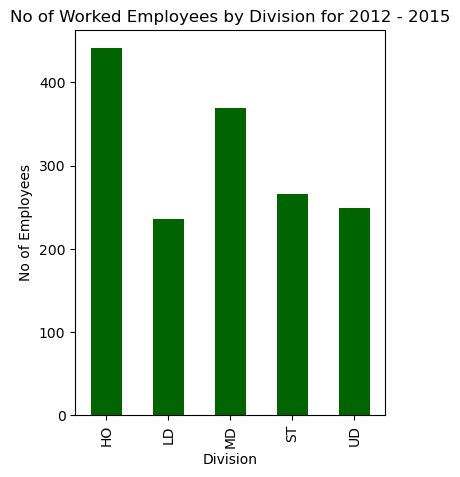

In [58]:
#Plot the No of Worrked Employees by Division
Divisional_Efficiency_df["No of Employees"].plot.bar(title="No of Worked Employees by Division for 2012 - 2015", ylabel="No of Employees", xlabel="Division", figsize=(4,5),color="DarkGreen")
plt.show()

Most Efficient Division

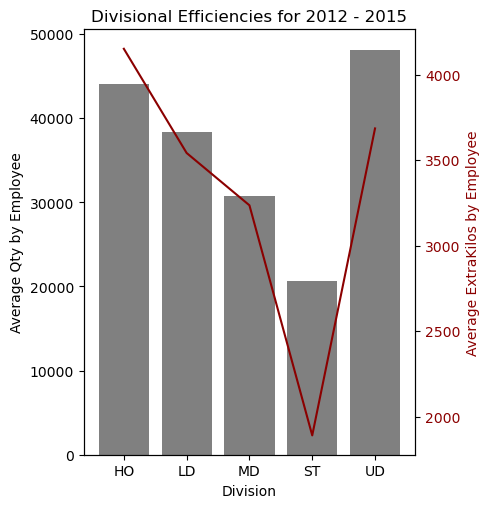

In [59]:
#Plot the Average Qty by Employees in Divisions & Average ExtraKilo by Employees in Divisions with two Y axes
fig, ax1 = plt.subplots(figsize=(5,5))
ax1.set_xlabel("Division")
ax1.set_ylabel("Average Qty by Employee")
ax1.bar(Divisional_Efficiency_df.index, Divisional_Efficiency_df["Average Qty by Employee"], color="Grey")
ax1.tick_params(axis="y")

ax2 = ax1.twinx()
ax2.set_ylabel("Average ExtraKilos by Employee", color="DarkRed")
ax2.plot(Divisional_Efficiency_df.index, Divisional_Efficiency_df["Average ExtraKilos by Employee"], color="DarkRed")
ax2.tick_params(axis="y", labelcolor="DarkRed")

fig.tight_layout()

plt.title("Divisional Efficiencies for 2012 - 2015")
plt.show()

Highest Productive Employees

In [60]:
Employee_Productive_df = merged_df.groupby("EmpCode").agg({"Qty": "sum", "ExtraKilos": "sum"})
Employee_Productive_df = Employee_Productive_df.rename(columns={"Qty": "Total Qty", "ExtraKilos": "Total ExtraKilos"})

Employee_Productive_Qty_df=Employee_Productive_df.sort_values(by="Total Qty", ascending=False)
Employee_Productive_EK_df=Employee_Productive_df.sort_values(by="Total ExtraKilos", ascending=False)

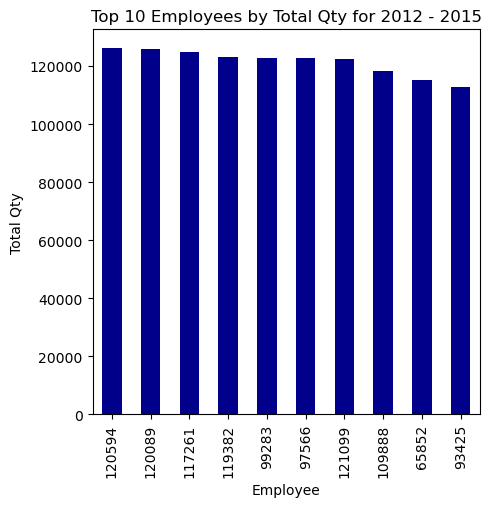

In [61]:
#Plot the Top 10 Employees by Total Qty
Employee_Productive_Qty_df["Total Qty"].head(10).plot.bar(title="Top 10 Employees by Total Qty for 2012 - 2015", ylabel="Total Qty", xlabel="Employee", figsize=(5,5),color="DarkBlue")
plt.show()

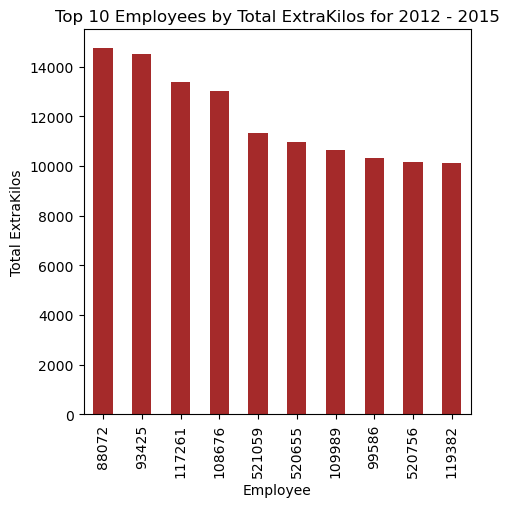

In [62]:
#Plot the Top 10 Employees by Total ExtraKilos
Employee_Productive_EK_df["Total ExtraKilos"].head(10).plot.bar(title="Top 10 Employees by Total ExtraKilos for 2012 - 2015", ylabel="Total ExtraKilos", xlabel="Employee", figsize=(5,5),color="Brown")
plt.show()

Make a Series by Merged Data Set

In [63]:
#Get a New DataFrame as merged_series_df
merged_series_df = merged_df.copy()

#Convert the Year, Month, and Day columns to integers
merged_series_df["Year"] = merged_series_df["Year"].astype(int)
merged_series_df["Month"] = merged_series_df["Month"].astype(int)
merged_series_df["Day"] = merged_series_df["Day"].astype(int)

#Set the new column `WorkDate` as the combination of Year, Month, and Day columns
merged_series_df["WorkDate"] = pd.to_datetime(merged_series_df[["Year", "Month", "Day"]])

#Drop the Year, Month, and Day columns
merged_series_df = merged_series_df.drop(columns=["Year", "Month", "Day"])

merged_series_df

,EmpCode,Work,Workdayfraction,Qty,ExtraKilos,Gender,Division,CropType,Field,Area (Ha),NumberOfTree,Type,Estate,WorkDate
0,41107,ABS,1.0,22.000000,0.0,F,HO,T,4CVP,2.0,26000,R,EST,2012-06-20
1,121200,SAC,1.0,58.000000,0.0,F,HO,T,6A,0.8,9302,R,EST,2012-05-14
2,121200,SAC,1.0,58.000000,0.0,F,HO,T,6A,0.8,9302,R,EST,2012-01-27
3,121200,SAC,1.0,58.000000,0.0,F,HO,T,6A,0.8,9302,R,EST,2013-06-13
4,121200,SAC,1.0,58.000000,0.0,F,HO,T,6A,0.8,9302,R,EST,2014-03-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043800,2020808,ABS,1.0,58.000000,18.0,M,LD,T,4I,2.0,26000,R,EST,2012-01-18
1043801,6063131,ABS,1.0,58.000000,18.0,M,UD,T,GEN,3.0,17631,R,EST,2012-06-06
1043802,6065252,ABS,1.0,58.000000,18.0,F,MD,T,GM12,3.0,26000,C,EST,2013-01-22
1043803,1060500,ABS,1.0,58.000000,18.0,F,MD,T,CMDG,2.0,26000,C,EST,2013-05-15


In [64]:
#Get the count of number of workdays by the Year and Month
Work_Days_df = merged_series_df.groupby([merged_series_df["WorkDate"].dt.to_period('M')]).agg({
    "WorkDate":"nunique"
})

#Rename the column `WorDate` to `No of Work Days`
Work_Days_df = Work_Days_df.rename(columns={"WorkDate": "No of Work Days"})

#sort No of Work Days by ascending order
Work_Days_df = Work_Days_df.sort_values(by="No of Work Days", ascending=True)
Work_Days_df.head()

,No of Work Days
WorkDate,
2015-11,14
2015-02,25
2013-04,27
2013-02,27
2014-02,27


No of Working Days in 2015-11 Months is less than the half of the month. Therefore from hereafter, the 2015-11 Month will be dropped from the data set for month wise evalautaions

In [65]:
#columns in the merged_series_df DataFrame
merged_series_df.columns

Index(['EmpCode', 'Work', 'Workdayfraction', 'Qty', 'ExtraKilos', 'Gender',
       'Division', 'CropType', 'Field', 'Area (Ha)', 'NumberOfTree', 'Type',
       'Estate', 'WorkDate'],
      dtype='object')

In [66]:
import numpy as np

#Define the Work_Date_df DataFrame by the Year and Month in the WorkDate column
Work_Date_df = merged_series_df.groupby([merged_series_df["WorkDate"].dt.to_period('M')]).agg({
    "EmpCode": "nunique",
    "Qty": "sum",
    "ExtraKilos": "sum",
})
Work_Date_df = Work_Date_df.rename(columns={
    "EmpCode": "No of Employees",
    "Qty": "Total Qty",
    "ExtraKilos": "Total ExtraKilos"
})

In [67]:
#Drop the row that has the 2015-11 WorkDate
Work_Date_df = Work_Date_df.drop(index="2015-11")

#Sort the Work_Date_df DataFrame by ascending order
Work_Date_df = Work_Date_df.sort_values(by="WorkDate", ascending=True)
Work_Date_df

,No of Employees,Total Qty,Total ExtraKilos
WorkDate,,,
2012-01,961,1.365407e+06,120006.574774
2012-02,993,1.166703e+06,116465.242103
2012-03,1011,1.262236e+06,143537.154084
2012-04,1011,1.206022e+06,159444.139712
2012-05,1013,1.333179e+06,153048.331462
2012-06,1037,1.308845e+06,140855.771441
2012-07,1038,1.430827e+06,119446.445727
2012-08,1038,1.441765e+06,137495.860839
2012-09,1042,1.348591e+06,123668.615468


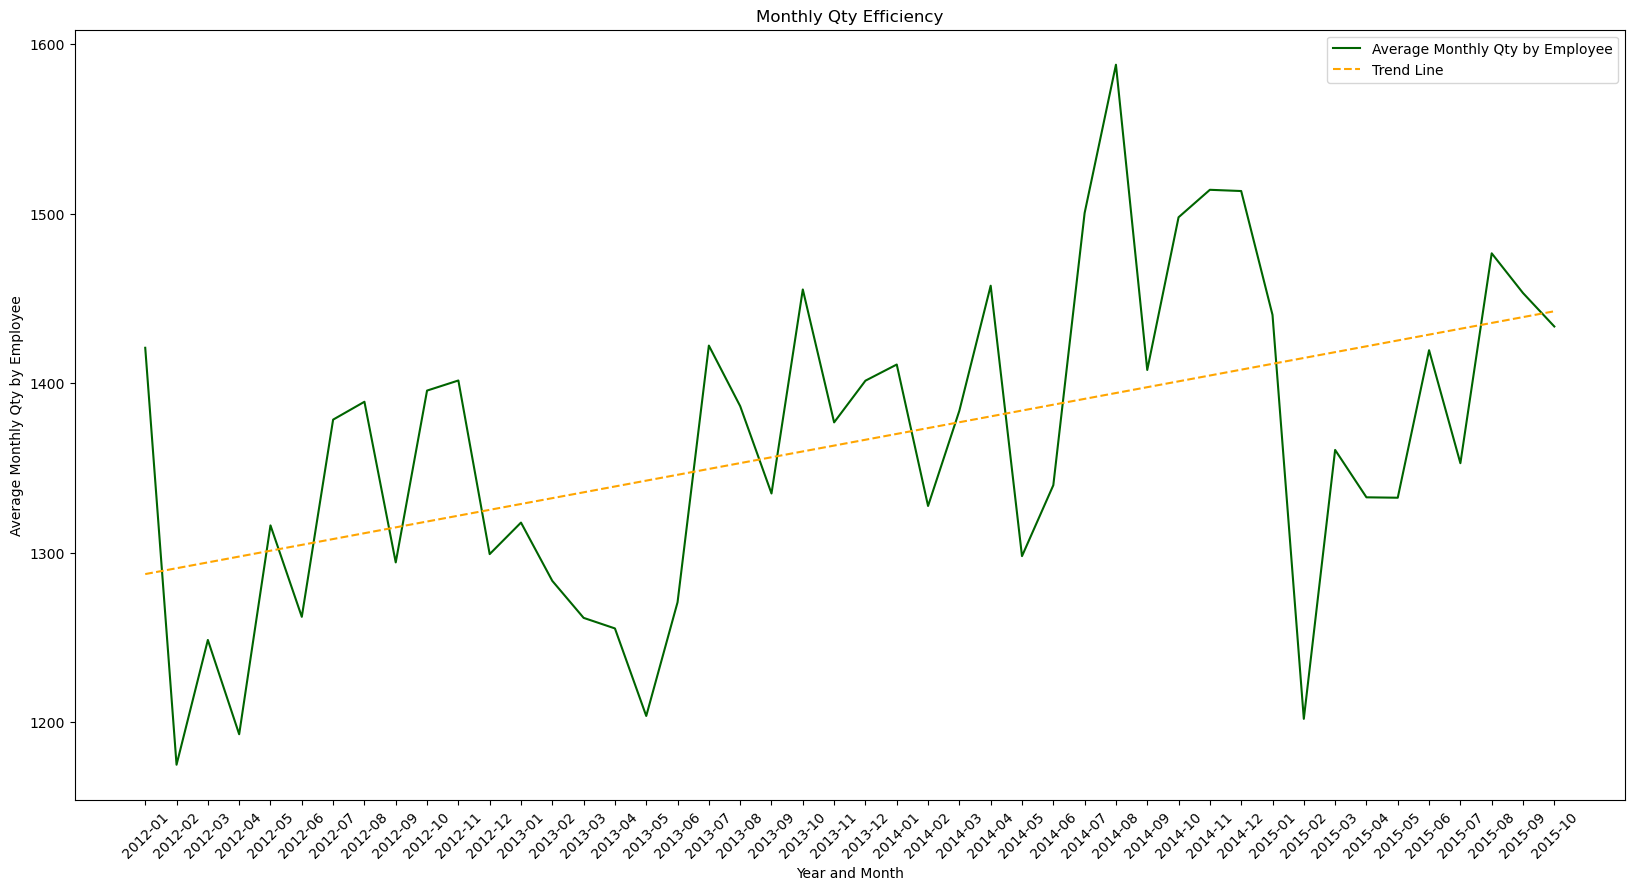

In [68]:
#Calculate average monthly Qty values
Work_Date_df["Average Monthly Qty by Employee"] = Work_Date_df["Total Qty"] / Work_Date_df["No of Employees"]

#Convert Period index to strings (Year-Month) for the x-axis
x_values = [str(idx) for idx in Work_Date_df.index]

#Plot the line chart
plt.figure(figsize=(20, 10))
plt.plot(x_values, Work_Date_df["Average Monthly Qty by Employee"], color="DarkGreen", label="Average Monthly Qty by Employee")

#Fit a linear trend line using numpy's polyfit
x = np.arange(len(Work_Date_df))
z = np.polyfit(x, Work_Date_df["Average Monthly Qty by Employee"].values, 1)
p = np.poly1d(z)
plt.plot(x_values, p(x), color='orange', linestyle='--', label='Trend Line')

plt.title("Monthly Qty Efficiency")
plt.ylabel("Average Monthly Qty by Employee")
plt.xlabel("Year and Month")
plt.xticks(rotation=45)
plt.legend()
plt.show()

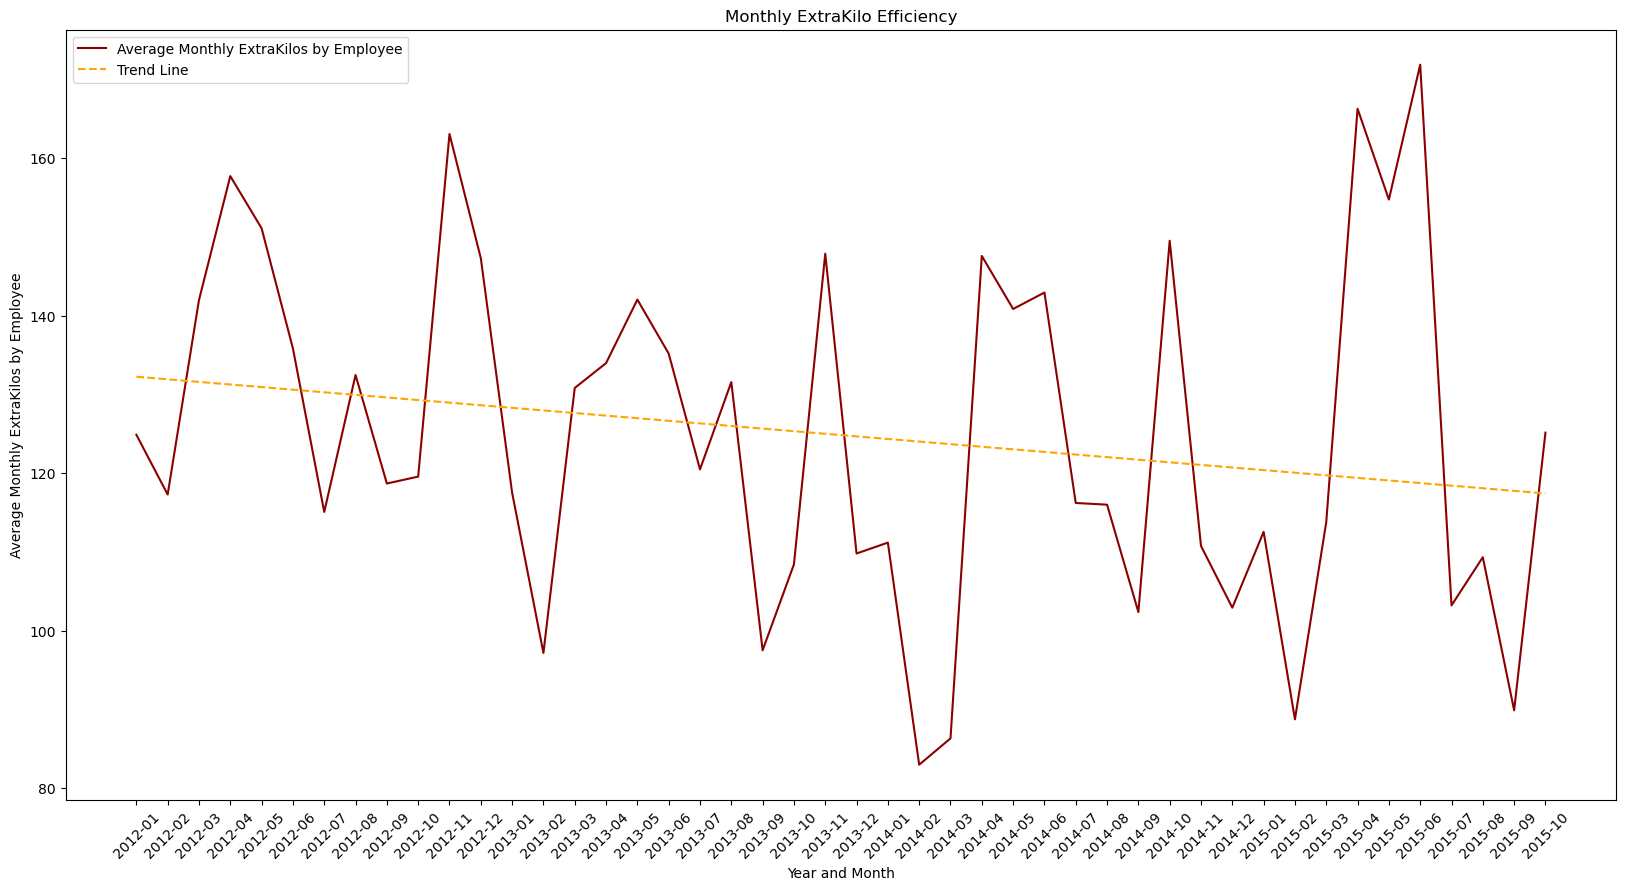

In [69]:
#Calculate average monthly ExtraKilos values
Work_Date_df["Average Monthly ExtraKilos by Employee"] = Work_Date_df["Total ExtraKilos"] / Work_Date_df["No of Employees"]

#Plot the line chart
plt.figure(figsize=(20, 10))
plt.plot(x_values, Work_Date_df["Average Monthly ExtraKilos by Employee"], color="DarkRed", label="Average Monthly ExtraKilos by Employee")

#Fit a linear trend line using numpy's polyfit
x = np.arange(len(Work_Date_df))
z = np.polyfit(x, Work_Date_df["Average Monthly ExtraKilos by Employee"].values, 1)
p = np.poly1d(z)
plt.plot(x_values, p(x), color='orange', linestyle='--', label='Trend Line')

plt.title("Monthly ExtraKilo Efficiency")
plt.ylabel("Average Monthly ExtraKilos by Employee")
plt.xlabel("Year and Month")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [70]:
merged_series_df

,EmpCode,Work,Workdayfraction,Qty,ExtraKilos,Gender,Division,CropType,Field,Area (Ha),NumberOfTree,Type,Estate,WorkDate
0,41107,ABS,1.0,22.000000,0.0,F,HO,T,4CVP,2.0,26000,R,EST,2012-06-20
1,121200,SAC,1.0,58.000000,0.0,F,HO,T,6A,0.8,9302,R,EST,2012-05-14
2,121200,SAC,1.0,58.000000,0.0,F,HO,T,6A,0.8,9302,R,EST,2012-01-27
3,121200,SAC,1.0,58.000000,0.0,F,HO,T,6A,0.8,9302,R,EST,2013-06-13
4,121200,SAC,1.0,58.000000,0.0,F,HO,T,6A,0.8,9302,R,EST,2014-03-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043800,2020808,ABS,1.0,58.000000,18.0,M,LD,T,4I,2.0,26000,R,EST,2012-01-18
1043801,6063131,ABS,1.0,58.000000,18.0,M,UD,T,GEN,3.0,17631,R,EST,2012-06-06
1043802,6065252,ABS,1.0,58.000000,18.0,F,MD,T,GM12,3.0,26000,C,EST,2013-01-22
1043803,1060500,ABS,1.0,58.000000,18.0,F,MD,T,CMDG,2.0,26000,C,EST,2013-05-15


In [71]:
Divisional_merged_series_df = merged_series_df.copy()

#Get the new column as 'WorkMonth' which is month and year from the WorkDate column
Divisional_merged_series_df["WorkMonth"] = Divisional_merged_series_df["WorkDate"].dt.strftime("%Y-%m")

#Drop the row that has the 2015-11 WorkMonth
Divisional_merged_series_df = Divisional_merged_series_df.drop(index=Divisional_merged_series_df[Divisional_merged_series_df["WorkMonth"] == "2015-11"].index)

#group the merged_series_df DataFrame by the Division and WorkMonth columns
Divisional_merged_series_df = Divisional_merged_series_df.groupby(["Division", "WorkMonth"]).agg({"EmpCode":"nunique","Qty": "sum", "ExtraKilos": "sum"})
Divisional_merged_series_df = Divisional_merged_series_df.rename(columns={"EmpCode":"No of Employees","Qty": "Total Qty", "ExtraKilos": "Total ExtraKilos"})

#Calculate average monthly Qty values by Divisions
Divisional_merged_series_df["Average Qty"] = Divisional_merged_series_df["Total Qty"] / Divisional_merged_series_df["No of Employees"]

#Calculate average monthly ExtraKilo values by Divisions
Divisional_merged_series_df["Average ExtraKilo"] = Divisional_merged_series_df["Total ExtraKilos"] / Divisional_merged_series_df["No of Employees"]

Divisional_merged_series_df

No of Employees      Total Qty  Total ExtraKilos  \
Division WorkMonth                                                     
HO       2012-01                264  380982.886186      28242.057823   
         2012-02                268  316829.659046      30771.483116   
         2012-03                273  349847.651893      36193.026288   
         2012-04                285  348105.069969      43246.907707   
         2012-05                285  376951.712447      40807.322691   
...                             ...            ...               ...   
UD       2015-06                153  206499.142572      21742.326704   
         2015-07                149  196244.247564      11424.651772   
         2015-08                149  221339.805394      15136.625360   
         2015-09                149  209731.954971      10012.604162   
         2015-10                148  206334.971539      16687.252363   

                    Average Qty  Average ExtraKilo  
Division WorkMonth                                  
HO       2012-01    1443.116993         106.977492  
         2012-02    1182.200220         114.818967  
         2012-03    1281.493230         132.575188  
         2012-04    1221.421298         151.743536  
         2012-05    1322.637588         143.183588  
...                         ...                ...  
UD       2015-06    1349.667599         142.106710  
         2015-07    1317.075487          76.675515  
         2015-08    1485.502050         101.588090  
         2015-09    1407.597013          67.198686  
         2015-10    1394.155213         112.751705  

[230 rows x 5 columns]

Divisional Total Qty & Divisional Qty Efficiency by Month

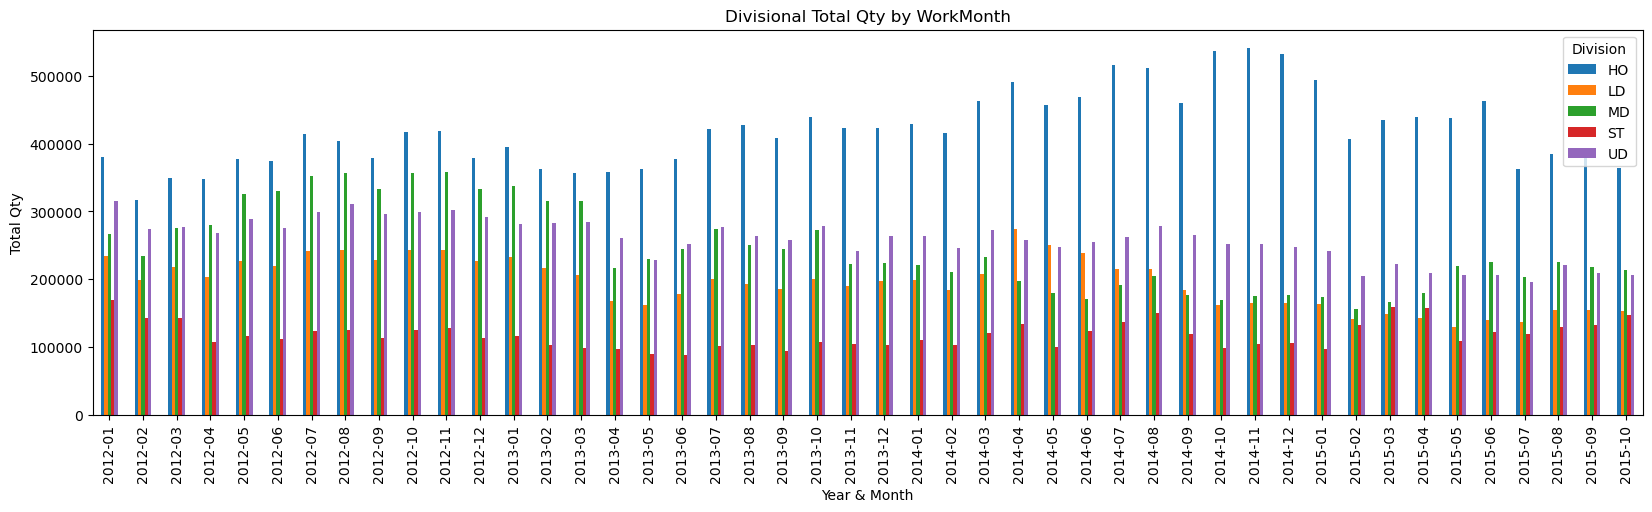

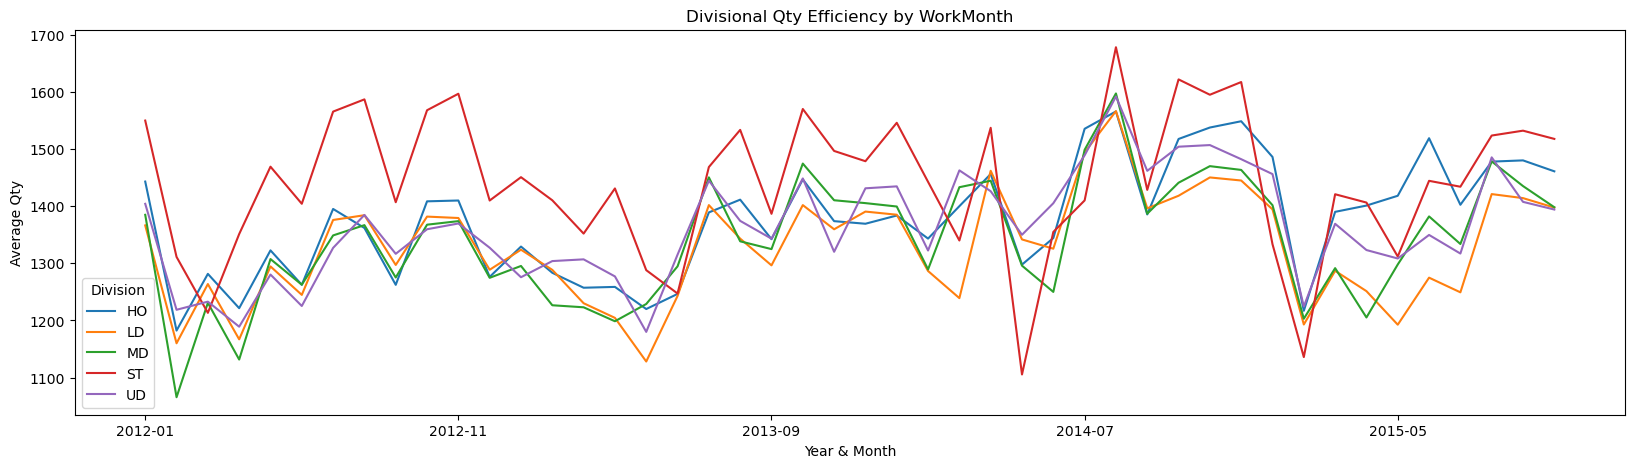

In [72]:
Divisional_merged_series_df["Total Qty"].unstack("Division").plot.bar(title="Divisional Total Qty by WorkMonth", ylabel="Total Qty", xlabel="Year & Month", figsize=(20,5))
Divisional_merged_series_df["Average Qty"].unstack("Division").plot.line(title="Divisional Qty Efficiency by WorkMonth", ylabel="Average Qty", xlabel="Year & Month", figsize=(20,5))

plt.show()

Divisional Total ExtraKIlos & Divisional ExtraKilo Efficiency by Work Month

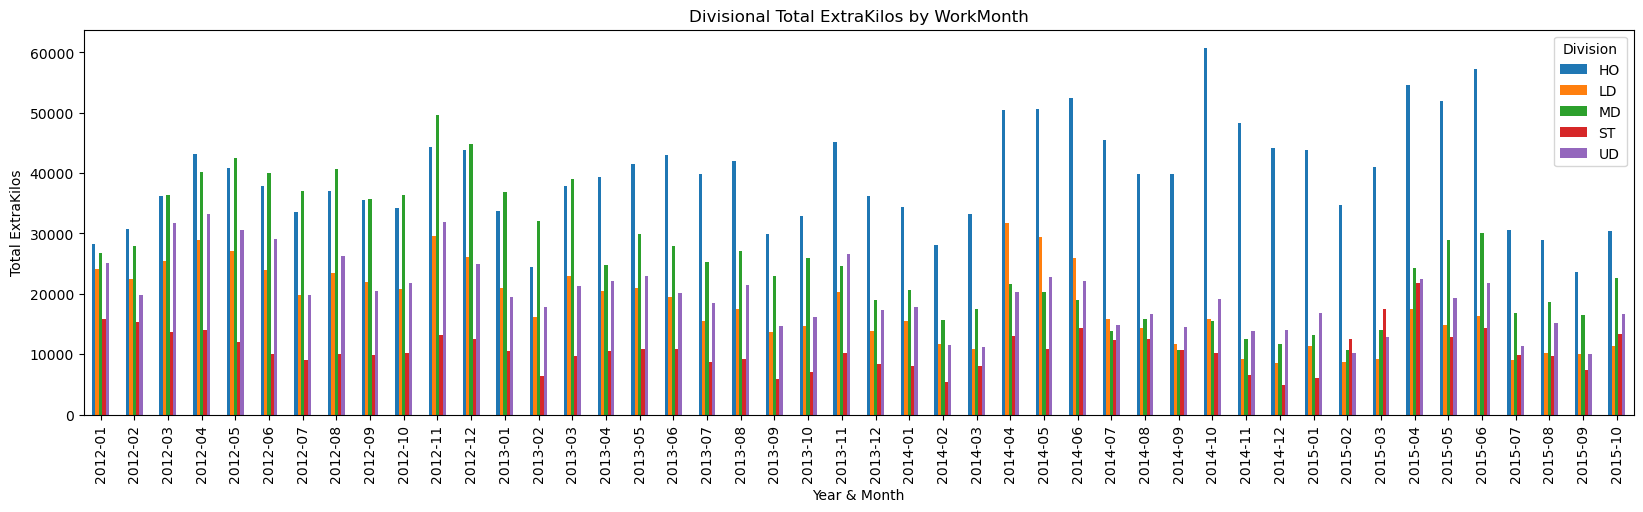

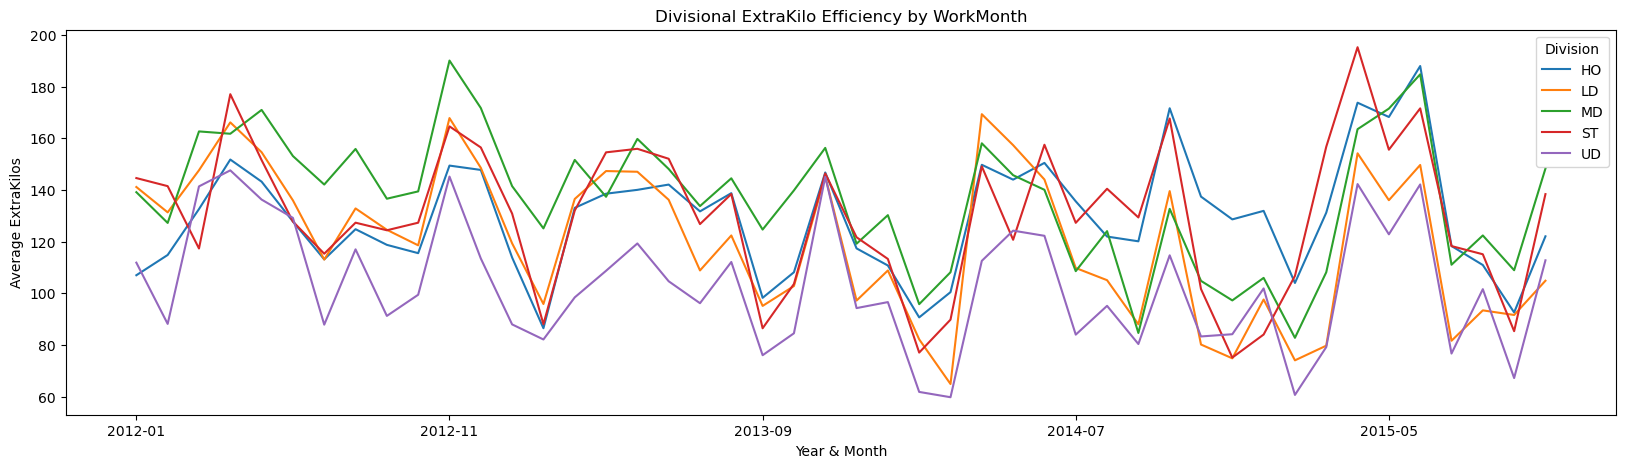

In [73]:
Divisional_merged_series_df["Total ExtraKilos"].unstack("Division").plot.bar(title="Divisional Total ExtraKilos by WorkMonth", ylabel="Total ExtraKilos", xlabel="Year & Month", figsize=(20,5))
Divisional_merged_series_df["Average ExtraKilo"].unstack("Division").plot.line(title="Divisional ExtraKilo Efficiency by WorkMonth", ylabel="Average ExtraKilos", xlabel="Year & Month", figsize=(20,5))

plt.show()

Correlation Matrix

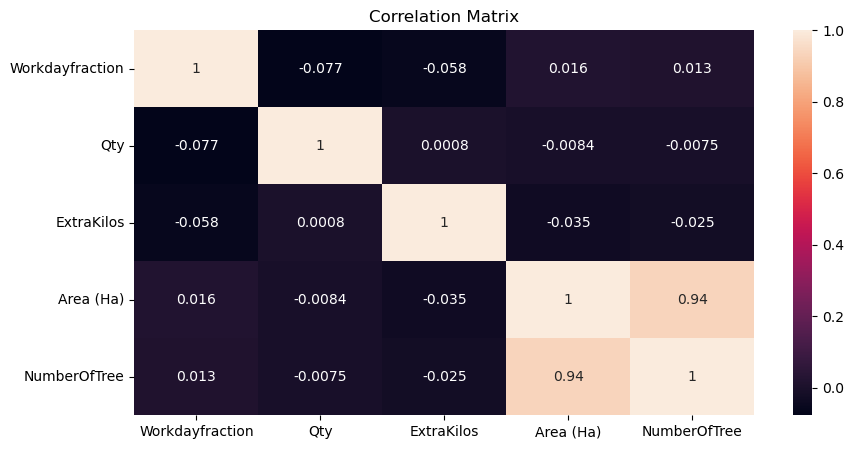

In [74]:
correlation_df = merged_series_df.copy()

import seaborn as sns

correlation_df = correlation_df[["Workdayfraction", "Qty", "ExtraKilos", "Area (Ha)", "NumberOfTree"]]
correlation_df = correlation_df.corr()

#Plot the correlation matrix as a heatmap
plt.figure(figsize=(10,5))
plt.title("Correlation Matrix")
sns.heatmap(correlation_df, annot=True)
plt.show()

Correlation between Area (Ha) and NumberofTree

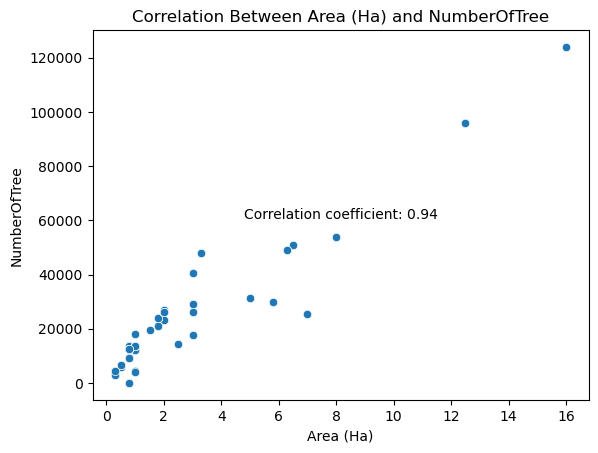

In [75]:
#Calculate the correlation between Area (Ha) and NumberOfTree
correlation_Area_n_NoOfTrees = merged_series_df['Area (Ha)'].corr(merged_series_df['NumberOfTree'])

#Create a scatter plot to visualize the correlation
sns.scatterplot(x='Area (Ha)', y='NumberOfTree', data=merged_series_df)
plt.title('Correlation Between Area (Ha) and NumberOfTree')
plt.xlabel('Area (Ha)')
plt.ylabel('NumberOfTree')

#Add a correlation coefficient annotation to the plot
plt.annotate(f'Correlation coefficient: {correlation_Area_n_NoOfTrees:.2f}', xy=(0.5, 0.5), xycoords='axes fraction', horizontalalignment='center', verticalalignment='center')

#Show the plot
plt.show()

# Creating Data Partitions & Applying to Machine Learning Models

## Creating Data Partitions

### Data Preperation

In [76]:
ml_l1_df = merged_series_df.copy()

In [77]:
ml_l1_df['Year'] = ml_l1_df['WorkDate'].dt.year
ml_l1_df['Month'] = ml_l1_df['WorkDate'].dt.month
ml_l1_df['Day'] = ml_l1_df['WorkDate'].dt.day

#Drop the original 'WorkDate' column
ml_l1_df.drop('WorkDate', axis=1, inplace=True)

ml_l1_df

,EmpCode,Work,Workdayfraction,Qty,ExtraKilos,Gender,Division,CropType,Field,Area (Ha),NumberOfTree,Type,Estate,Year,Month,Day
0,41107,ABS,1.0,22.000000,0.0,F,HO,T,4CVP,2.0,26000,R,EST,2012,6,20
1,121200,SAC,1.0,58.000000,0.0,F,HO,T,6A,0.8,9302,R,EST,2012,5,14
2,121200,SAC,1.0,58.000000,0.0,F,HO,T,6A,0.8,9302,R,EST,2012,1,27
3,121200,SAC,1.0,58.000000,0.0,F,HO,T,6A,0.8,9302,R,EST,2013,6,13
4,121200,SAC,1.0,58.000000,0.0,F,HO,T,6A,0.8,9302,R,EST,2014,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043800,2020808,ABS,1.0,58.000000,18.0,M,LD,T,4I,2.0,26000,R,EST,2012,1,18
1043801,6063131,ABS,1.0,58.000000,18.0,M,UD,T,GEN,3.0,17631,R,EST,2012,6,6
1043802,6065252,ABS,1.0,58.000000,18.0,F,MD,T,GM12,3.0,26000,C,EST,2013,1,22
1043803,1060500,ABS,1.0,58.000000,18.0,F,MD,T,CMDG,2.0,26000,C,EST,2013,5,15


In [78]:
#columns in the random_df DataFrame
ml_l1_df.columns

Index(['EmpCode', 'Work', 'Workdayfraction', 'Qty', 'ExtraKilos', 'Gender',
       'Division', 'CropType', 'Field', 'Area (Ha)', 'NumberOfTree', 'Type',
       'Estate', 'Year', 'Month', 'Day'],
      dtype='object')

In [79]:
#unique values in random_df DataFrame
ml_l1_df.nunique()


EmpCode            1561
Work                136
Workdayfraction       4
Qty                  95
ExtraKilos           22
Gender                2
Division              5
CropType              3
Field                63
Area (Ha)            18
NumberOfTree         34
Type                  3
Estate                1
Year                  4
Month                12
Day                  31
dtype: int64

Drop Variables and Create Dummy Variables

In [80]:
#Drop the 'Estate','Field','EmpCode',and 'Day' columns
ml_l1_df = ml_l1_df.drop(columns=["Estate", "Work", "Field", "EmpCode", "Day"])

#Create dummy variables
ml_l1_dummy_df = pd.get_dummies(ml_l1_df, columns=['Gender', 'Division', 'Workdayfraction','CropType','Type','Year','Month'])

#Replace True and False values with 1 and 0
ml_l1_dummy_df = ml_l1_dummy_df.replace({True: 1, False: 0})

ml_l1_dummy_df

,Qty,ExtraKilos,Area (Ha),NumberOfTree,Gender_F,Gender_M,Division_HO,Division_LD,Division_MD,Division_ST,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,22.000000,0.0,2.0,26000,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,58.000000,0.0,0.8,9302,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,58.000000,0.0,0.8,9302,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,58.000000,0.0,0.8,9302,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,58.000000,0.0,0.8,9302,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043800,58.000000,18.0,2.0,26000,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1043801,58.000000,18.0,3.0,17631,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1043802,58.000000,18.0,3.0,26000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1043803,58.000000,18.0,2.0,26000,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [81]:
#Inspect the random_df_dummy_df DataFrame
ml_l1_dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043805 entries, 0 to 1043804
Data columns (total 37 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Qty                   1043805 non-null  float64
 1   ExtraKilos            1043805 non-null  float64
 2   Area (Ha)             1043805 non-null  float64
 3   NumberOfTree          1043805 non-null  int64  
 4   Gender_F              1043805 non-null  int64  
 5   Gender_M              1043805 non-null  int64  
 6   Division_HO           1043805 non-null  int64  
 7   Division_LD           1043805 non-null  int64  
 8   Division_MD           1043805 non-null  int64  
 9   Division_ST           1043805 non-null  int64  
 10  Division_UD           1043805 non-null  int64  
 11  Workdayfraction_0.5   1043805 non-null  int64  
 12  Workdayfraction_0.75  1043805 non-null  int64  
 13  Workdayfraction_1.0   1043805 non-null  int64  
 14  Workdayfraction_1.5   1043805 non-

### Data Partitions with Holdout Method

In [82]:
ho_ml_df=ml_l1_dummy_df.copy()

In [83]:
#use holdout method to split the data into training and testing sets
from sklearn.model_selection import train_test_split

#Define the target set y
y_ho = ho_ml_df["Qty"].values

#Define the features set X
X_ho = ho_ml_df.drop(["Qty"], axis=1)

#Split the data into training and testing sets with Holdout method
X_train_ho, X_test_ho, y_train_ho, y_test_ho = train_test_split(X_ho, y_ho, random_state=78)

In [84]:
#Show the properties of the training and testing sets
print(f"Training Set Size: {X_train_ho.shape[0]}")
print(f"Testing Set Size: {X_test_ho.shape[0]}")

Training Set Size: 782853
Testing Set Size: 260952


### Data Partitions with Bootstrap Method

In [85]:
bs_ml_df=ml_l1_dummy_df.copy()

In [86]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

#Define the target set y
y_bs = bs_ml_df["Qty"].values

#Define the features set X
X_bs = bs_ml_df.drop(["Qty"], axis=1)

#Resample the data using bootstrap method
X_bs_resampled, y_bs_resampled = resample(X_bs, y_bs, replace=True, random_state=2)

#Split the resampled data into training and testing sets
X_train_bs, X_test_bs, y_train_bs, y_test_bs = train_test_split(X_bs_resampled, y_bs_resampled, test_size=0.2, random_state=78)

In [87]:
#Show the properties of the training and testing sets
print(f"Bootstrap L1 Training Set Size: {X_train_bs.shape[0]}")
print(f"Bootstrap L1 Testing Set Size: {X_test_bs.shape[0]}")

Bootstrap L1 Training Set Size: 835044
Bootstrap L1 Testing Set Size: 208761


## Linear Regression Model & Improved Linear Regression Model

### Applying for Linear Regression Model

Data partition part is already done. Selected partioned data sets were decided with Bootstrap Method

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Create a Linear Regression model
lr_model_bs = LinearRegression()

#Fit the model to the bootstrapped training data
lr_model_bs.fit(X_train_bs, y_train_bs)

#Make predictions using the testing data
y_pred_bs = lr_model_bs.predict(X_test_bs)

#Calculate the Mean Squared Error (MSE), R-squared (R2) of the model, Mean Absolute Error (MAE)
mse_bs = mean_squared_error(y_test_bs, y_pred_bs)
r2_bs = r2_score(y_test_bs, y_pred_bs)
mae_bs = mean_absolute_error(y_test_bs, y_pred_bs)

print(f"Mean Squared Error (MSE) of Linear Regression Model with Bootstrap Data Split: {mse_bs:.6f}")
print(f"R-squared (R2) of Linear Regression Model with Bootstrap Data Split: {r2_bs:.6f}")
print(f"Mean Absolute Error (MAE) of Linear Regression Model with Bootstrap Data Split: {mae_bs:.6f}")

Mean Squared Error (MSE) of Linear Regression Model with Bootstrap Data Split: 383.110642
R-squared (R2) of Linear Regression Model with Bootstrap Data Split: 0.028425
Mean Absolute Error (MAE) of Linear Regression Model with Bootstrap Data Split: 16.882438


### Improving the Model

Standard Scaling

In [89]:
from sklearn.preprocessing import StandardScaler

#Create a StandardScaler object
scaler = StandardScaler()

#Fit the scaler to the training data
scaler.fit(X_train_bs)

#Transform the training and testing data using the scaler
X_train_bs_scaled = scaler.transform(X_train_bs)
X_test_bs_scaled = scaler.transform(X_test_bs)

#Create a Linear Regression model
lr_model_bs_scaled = LinearRegression()

#Fit the model to the scaled training data
lr_model_bs_scaled.fit(X_train_bs_scaled, y_train_bs)

#Make predictions using the scaled testing data
y_pred_bs_scaled = lr_model_bs_scaled.predict(X_test_bs_scaled)

#Calculate the Mean Squared Error (MSE), R-squared (R2) of the model, Mean Absolute Error (MAE)
mse_bs_scaled = mean_squared_error(y_test_bs, y_pred_bs_scaled)
r2_bs_scaled = r2_score(y_test_bs, y_pred_bs_scaled)
mae_bs_scaled = mean_absolute_error(y_test_bs, y_pred_bs_scaled)

print(f"Mean Squared Error (MSE) of Linear Regression Model with Bootstrap Data Spit with Scaling: {mse_bs_scaled:.6f}")
print(f"R-squared (R2) of Linear Regression Model with Bootstrap Data Spit with Scaling: {r2_bs_scaled:.6f}")
print(f"Mean Absolute Error (MAE) of Linear Regression Model with Bootstrap Data Spit with Scaling: {mae_bs_scaled:.6f}")

Mean Squared Error (MSE) of Linear Regression Model with Bootstrap Data Spit with Scaling: 383.107095
R-squared (R2) of Linear Regression Model with Bootstrap Data Spit with Scaling: 0.028434
Mean Absolute Error (MAE) of Linear Regression Model with Bootstrap Data Spit with Scaling: 16.881854


## K-Nearest Nieghbor Classification & Improved K-Nearest Nieghbors Classification

### Data Preperation

In [90]:
#Create a copy of the merged_series_df DataFrame
ml_l2_df = merged_series_df.copy()

#Drop the 'Estate', 'Field', 'EmpCode', and 'WorkDate' columns
ml_l2_df = ml_l2_df.drop(columns=["Estate", "Field", "EmpCode", "WorkDate","Work"])

#Create a dictionary to map the Division values to integers
division_map = {"HO": 0, "LD": 1, "MD": 2, "ST": 3, "UD": 4}

#Map the Division values to integers using the division_map dictionary
ml_l2_df["Division"] = ml_l2_df["Division"].map(division_map)

#Drop any rows with missing values
ml_l2_df = ml_l2_df.dropna()

#Convert the 'Division' column to integer type
ml_l2_df["Division"] = ml_l2_df["Division"].astype(int)


ml_l2_df

,Workdayfraction,Qty,ExtraKilos,Gender,Division,CropType,Area (Ha),NumberOfTree,Type
0,1.0,22.000000,0.0,F,0,T,2.0,26000,R
1,1.0,58.000000,0.0,F,0,T,0.8,9302,R
2,1.0,58.000000,0.0,F,0,T,0.8,9302,R
3,1.0,58.000000,0.0,F,0,T,0.8,9302,R
4,1.0,58.000000,0.0,F,0,T,0.8,9302,R
...,...,...,...,...,...,...,...,...,...
1043800,1.0,58.000000,18.0,M,1,T,2.0,26000,R
1043801,1.0,58.000000,18.0,M,4,T,3.0,17631,R
1043802,1.0,58.000000,18.0,F,2,T,3.0,26000,C
1043803,1.0,58.000000,18.0,F,2,T,2.0,26000,C


In [91]:
#Create dummy variables for the 'CropType', 'Type', and 'Gender' columns
ml_l2_dummy_df = pd.get_dummies(ml_l2_df, columns=['CropType', 'Type', 'Gender'])

#Replace True and False values with 1 and 0
ml_l2_dummy_df = ml_l2_dummy_df.replace({True: 1, False: 0})

ml_l2_dummy_df

,Workdayfraction,Qty,ExtraKilos,Division,Area (Ha),NumberOfTree,CropType_B,CropType_T,CropType_V,Type_C,Type_O,Type_R,Gender_F,Gender_M
0,1.0,22.000000,0.0,0,2.0,26000,0,1,0,0,0,1,1,0
1,1.0,58.000000,0.0,0,0.8,9302,0,1,0,0,0,1,1,0
2,1.0,58.000000,0.0,0,0.8,9302,0,1,0,0,0,1,1,0
3,1.0,58.000000,0.0,0,0.8,9302,0,1,0,0,0,1,1,0
4,1.0,58.000000,0.0,0,0.8,9302,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043800,1.0,58.000000,18.0,1,2.0,26000,0,1,0,0,0,1,0,1
1043801,1.0,58.000000,18.0,4,3.0,17631,0,1,0,0,0,1,0,1
1043802,1.0,58.000000,18.0,2,3.0,26000,0,1,0,1,0,0,1,0
1043803,1.0,58.000000,18.0,2,2.0,26000,0,1,0,1,0,0,1,0


### Splitting the Data with Bootstrapping Method and Apply for K-Nearest Neighbors Classification

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.utils import resample

#Define the target variable y
y = ml_l2_dummy_df["Division"].values

#Define the feature set X
X = ml_l2_dummy_df.drop(["Division"], axis=1)

#Resample the data using bootstrap method
X_resampled, y_resampled = resample(X, y, replace=True, random_state=2)

#Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=78)

#Create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

#Fit the classifier to the training data
knn.fit(X_train, y_train)

#Make predictions using the testing data
y_pred = knn.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

#Calculate the F1 score of the model
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Accuracy of KNN classification model with bootstrap data split: {accuracy:.6f}")
print(f"F1 Score of KNN classification model with bootstrap data split: {f1:.6f}")

Accuracy of KNN classification model with bootstrap data split: 0.889601
F1 Score of KNN classification model with bootstrap data split: 0.887698


In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Create a confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')

#Print the confusion matrix
print(cm)


[[0.9698118  0.01323494 0.00247888 0.01349137 0.000983  ]
 [0.06692736 0.75927207 0.16092646 0.00388028 0.00899383]
 [0.00169808 0.08352134 0.86434757 0.00885428 0.04157873]
 [0.19688504 0.01196539 0.06121137 0.72390606 0.00603214]
 [0.0091396  0.00647293 0.02053561 0.0037151  0.96013675]]


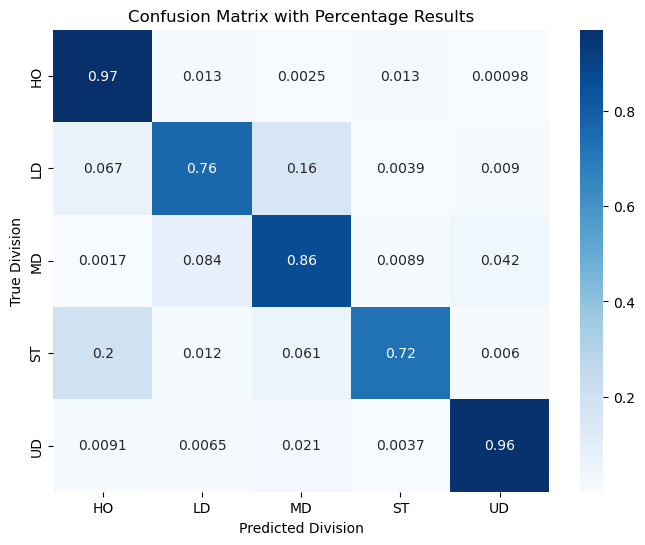

In [94]:
#Create a heatmap of the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=division_map.keys(), yticklabels=division_map.keys())
plt.title('Confusion Matrix with Percentage Results')
plt.xlabel('Predicted Division')
plt.ylabel('True Division')
plt.show()

### Improving the Model

Using Feature Selection Approach

In [95]:
from sklearn.feature_selection import SelectKBest, chi2

#Create a SelectKBest object to select the top 10 features
selector = SelectKBest(chi2, k=10)

#Fit the selector to the training data
selector.fit(X_train, y_train)

#Transform the training and testing data using the selector
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

#Create a KNN classifier with k=5
knn_selected = KNeighborsClassifier(n_neighbors=5)

#Fit the classifier to the selected training data
knn_selected.fit(X_train_selected, y_train)

#Make predictions using the selected testing data
y_pred_selected = knn_selected.predict(X_test_selected)

#Calculate the accuracy of the model
accuracy_selected = accuracy_score(y_test, y_pred_selected)

#Calculate the F1 score of the model
f1_selected = f1_score(y_test, y_pred_selected, average="weighted")

print(f"Accuracy of KNN classification model with feature selection: {accuracy_selected:.6f}")
print(f"F1 Score of KNN classification model with feature selection: {f1_selected:.6f}")

Accuracy of KNN classification model with feature selection: 0.893768
F1 Score of KNN classification model with feature selection: 0.891233


In [96]:
#Create a confusion matrix
cm_improved = confusion_matrix(y_test, y_pred_selected, normalize='true')

#Print the confusion matrix
print(cm_improved)


[[9.84898779e-01 8.83278959e-03 3.46188366e-03 2.53586540e-03
  2.70682262e-04]
 [7.21913070e-02 7.25462476e-01 1.89171304e-01 2.13565950e-03
  1.10392540e-02]
 [0.00000000e+00 6.41632099e-02 8.73711278e-01 1.61802877e-02
  4.59452248e-02]
 [2.00444994e-01 6.67490729e-03 4.97898640e-02 7.39381953e-01
  3.70828183e-03]
 [1.00056980e-02 6.74643875e-03 1.42222222e-02 3.50997151e-03
  9.65515670e-01]]


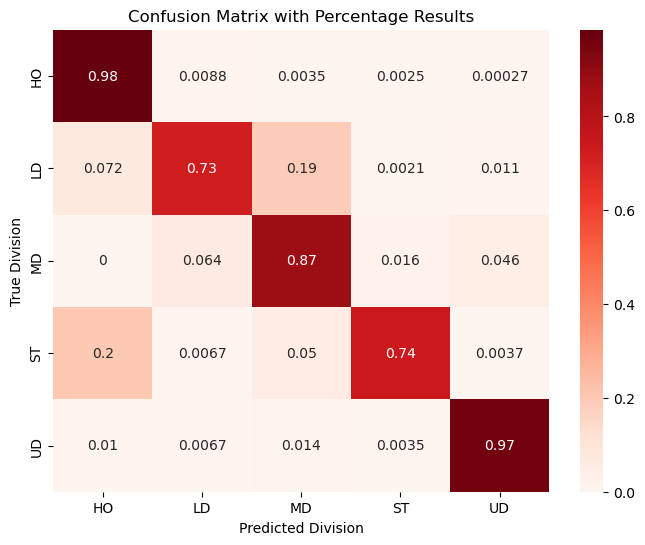

In [97]:

#Create a heatmap of the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_improved, annot=True, cmap='Reds', xticklabels=division_map.keys(), yticklabels=division_map.keys())
plt.title('Confusion Matrix with Percentage Results')
plt.xlabel('Predicted Division')
plt.ylabel('True Division')
plt.show()

## Decision Tree Analysis & Improved Decision Tree Analysis

### Data Preperation

In [98]:
ml_l3_dummy_df = ml_l1_dummy_df.copy()

#Drop any rows with missing values
ml_l3_dummy_df = ml_l3_dummy_df.dropna()

ml_l3_dummy_df


,Qty,ExtraKilos,Area (Ha),NumberOfTree,Gender_F,Gender_M,Division_HO,Division_LD,Division_MD,Division_ST,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,22.000000,0.0,2.0,26000,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,58.000000,0.0,0.8,9302,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,58.000000,0.0,0.8,9302,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,58.000000,0.0,0.8,9302,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,58.000000,0.0,0.8,9302,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043800,58.000000,18.0,2.0,26000,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1043801,58.000000,18.0,3.0,17631,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1043802,58.000000,18.0,3.0,26000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1043803,58.000000,18.0,2.0,26000,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


### Splitting the Data with Bootstrapping Method and Apply for Decision Tree Regression


In [99]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.utils import resample

#Define the target variable y
y = ml_l3_dummy_df["Qty"].values

#Define the feature set X
X = ml_l3_dummy_df.drop(["Qty"], axis=1)

#Resample the data using bootstrap method
X_resampled, y_resampled = resample(X, y, replace=True, random_state=2)

#Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=78)

#Create a Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=78)

#Fit the model to the training data
dt_model.fit(X_train, y_train)

#Make predictions using the testing data
y_pred = dt_model.predict(X_test)

#Calculate the Mean Squared Error (MSE), R-squared (R2) of the model, Mean Absolute Error (MAE)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE) of Decision Tree Regression Model with Bootstrap Data Split: {mse:.6f}")
print(f"R-squared (R2) of Decision Tree Regression Model with Bootstrap Data Split: {r2:.6f}")
print(f"Mean Absolute Error (MAE) of Decision Tree Regression Model with Bootstrap Data Split: {mae:.6f}")

Mean Squared Error (MSE) of Decision Tree Regression Model with Bootstrap Data Split: 366.346160
R-squared (R2) of Decision Tree Regression Model with Bootstrap Data Split: 0.070940
Mean Absolute Error (MAE) of Decision Tree Regression Model with Bootstrap Data Split: 15.372426


### Improve the Model

In [100]:
from sklearn.preprocessing import StandardScaler

#Create a StandardScaler object
scaler = StandardScaler()

#Fit the scaler to the training data
scaler.fit(X_train)

#Transform the training and testing data using the scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Create a Decision Tree Regression model
dt_model_scaled = DecisionTreeRegressor(random_state=78)

#Fit the model to the scaled training data
dt_model_scaled.fit(X_train_scaled, y_train)

#Make predictions using the scaled testing data
y_pred_scaled = dt_model_scaled.predict(X_test_scaled)

#Calculate the Mean Squared Error (MSE), R-squared (R2), Mean Absolute Error (MAE)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)


print(f"Mean Squared Error (MSE) of Decision Tree Regression Model with Bootstrap Data Split and Scaling: {mse_scaled:.6f}")
print(f"R-squared (R2) of Decision Tree Regression Model with Bootstrap Data Split and Scaling: {r2_scaled:.6f}")
print(f"Mean Absolute Error (MAE) of Decision Tree Regression Model with Bootstrap Data Split and Scaling: {mae_scaled:.6f}")

Mean Squared Error (MSE) of Decision Tree Regression Model with Bootstrap Data Split and Scaling: 366.327882
R-squared (R2) of Decision Tree Regression Model with Bootstrap Data Split and Scaling: 0.070986
Mean Absolute Error (MAE) of Decision Tree Regression Model with Bootstrap Data Split and Scaling: 15.371594


In [101]:
#Create a dataframe with the accuracy metrics
Models_Summary_df = pd.DataFrame({'Model': ['Linear Regression', 'Linear Regression with Scaling', 'KNN Classifier', 'KNN Classifier with Feature Selection', 'Decision Tree Regression', 'Decision Tree Regression with Scaling'],
                   'Mean Squared Error': [mse_bs, mse_bs_scaled, None, None, mse, mse_scaled],
                   'R-squared': [r2_bs, r2_bs_scaled, None, None, r2, r2_scaled],
                   'Mean Absolute Error': [mae_bs, mae_bs_scaled, None, None, mae, mae_scaled],
                   'Accuracy': [None, None, accuracy, accuracy_selected, None, None],
                   'F1 Score': [None, None, f1, f1_selected, None, None]})

#Set the index to the model name
Models_Summary_df.set_index('Model', inplace=True)

#Replace NaN with "N/A"
Models_Summary_df.fillna("N/A", inplace=True)

#Display the dataframe
Models_Summary_df

,Mean Squared Error,R-squared,Mean Absolute Error,Accuracy,F1 Score
Model,,,,,
Linear Regression,383.110642,0.028425,16.882438,N/A,N/A
Linear Regression with Scaling,383.107095,0.028434,16.881854,N/A,N/A
KNN Classifier,N/A,N/A,N/A,0.889601,0.887698
KNN Classifier with Feature Selection,N/A,N/A,N/A,0.893768,0.891233
Decision Tree Regression,366.34616,0.07094,15.372426,N/A,N/A
Decision Tree Regression with Scaling,366.327882,0.070986,15.371594,N/A,N/A
